In [1]:
import random
import pickle
import pandas as pd
import numpy as np
import math
import time
structure = ['树','图','数据结构','数学','搜索','算法','Goodbye系列','DP','变换','仙人掌','构造','模板题','交互式','分治']

## 选择合适的数据结构
- 用LFM模型训练选择出来的445个用户
- 将当前用户和用户池做相似性比对
- 选择最相似的用户的值 算出该用户对每个数据结构的爱好程度

In [2]:
class SVD():
    def __init__(self, rating_data, F, alpha=0.0001, lmbda=0.1, max_iter=100):
        self.F = F           # 这个表示隐向量的维度
        self.P = dict()          #  用户矩阵P  大小是[users_num, F]
        self.Q = dict()     # 物品矩阵Q  大小是[item_nums, F]
        self.bu = dict()   # 用户偏差系数
        self.bi = dict()    # 物品偏差系数
        self.mu = 1.0        # 全局偏差系数
        self.alpha = alpha   # 学习率
        self.lmbda = lmbda    # 正则项系数
        self.max_iter = max_iter    # 最大迭代次数
        self.rating_data = rating_data # 评分矩阵
        
        cnt = 0    # 统计总的打分数， 初始化mu用
        for user, items in self.rating_data.items():
            self.P[user] = [random.random() / math.sqrt(self.F)  for x in range(0, F)]
            self.bu[user] = 0
            cnt += len(items) 
            for item, rating in items.items():
                if item not in self.Q:
                    self.Q[item] = [random.random() / math.sqrt(self.F) for x in range(0, F)]
                    self.bi[item] = 0
        self.mu /= cnt
        
    # 有了矩阵之后， 就可以进行训练, 这里使用随机梯度下降的方式训练参数P和Q
    def train(self):
        loss_list = []
        for step in range(self.max_iter):
            all_rui = 0
            for user, items in self.rating_data.items():
                for item, rui in items.items():
                    rhat_ui = self.predict(user, item)   # 得到预测评分
                    # 计算误差
                    e_ui = np.abs(rui - rhat_ui)
                    all_rui += e_ui
                    
                    self.bu[user] += self.alpha * (e_ui - self.lmbda * self.bu[user])
                    self.bi[item] += self.alpha * (e_ui - self.lmbda * self.bi[item])
                    # 随机梯度下降更新梯度
                    for k in range(0, self.F):
                        self.P[user][k] += self.alpha * (e_ui*self.Q[item][k] - self.lmbda * self.P[user][k])
                        self.Q[item][k] += self.alpha * (e_ui*self.P[user][k] - self.lmbda * self.Q[item][k])
            mean_rui = all_rui/(445*14)
            loss_list.append(mean_rui)
            print('step:{},loss:{}'.format(step,mean_rui))
            
                    
            self.alpha *= 0.9
        return loss_list
    
    # 预测
    def predict(self, user, item):
        return sum(self.P[user][f] * self.Q[item][f] for f in range(0, self.F)) + self.bu[user] + self.bi[item]
    
    def save(self):
        f = open('lfm.model','wb')
        pickle.dump((self.P,self.Q),f)
        f.close()
    
    def load(self):
        f = open('lfm.model','rb')
        self.P,self.Q = pickle.load(f)
        f.close()

In [3]:
### 将dataframe转换为dict格式
user = pd.read_csv('all_user.csv')
new_dict = {}
user = user.iloc[:,8:]
dict_ = user.to_dict('records')
new_dict = {}
for i in range(len(dict_)):
    new_dict[str(i)] = dict_[i]
new_dict

{'0': {'树': 5.0,
  '图': 1.0,
  '数据结构': 0.0,
  '数学': 2.0,
  '搜索': 0.0,
  '算法': 0.0,
  'Goodbye系列': 1.0,
  'DP': 0.0,
  '变换': 0.0,
  '仙人掌': 0.0,
  '构造': 1.0,
  '模板题': 1.0,
  '交互式': 1.0,
  '分治': 0.0},
 '1': {'树': 3.0,
  '图': 0.0,
  '数据结构': 0.0,
  '数学': 2.0,
  '搜索': 0.0,
  '算法': 0.0,
  'Goodbye系列': 0.0,
  'DP': 1.0,
  '变换': 0.0,
  '仙人掌': 0.0,
  '构造': 0.0,
  '模板题': 0.0,
  '交互式': 0.0,
  '分治': 1.0},
 '2': {'树': 0.0,
  '图': 1.0,
  '数据结构': 0.0,
  '数学': 0.0,
  '搜索': 0.0,
  '算法': 0.0,
  'Goodbye系列': 4.0,
  'DP': 2.0,
  '变换': 0.0,
  '仙人掌': 0.0,
  '构造': 0.0,
  '模板题': 0.0,
  '交互式': 0.0,
  '分治': 0.0},
 '3': {'树': 11.0,
  '图': 3.0,
  '数据结构': 6.0,
  '数学': 10.0,
  '搜索': 1.0,
  '算法': 1.0,
  'Goodbye系列': 6.0,
  'DP': 14.0,
  '变换': 7.0,
  '仙人掌': 0.0,
  '构造': 2.0,
  '模板题': 3.0,
  '交互式': 5.0,
  '分治': 4.0},
 '4': {'树': 0.0,
  '图': 0.0,
  '数据结构': 0.0,
  '数学': 0.0,
  '搜索': 0.0,
  '算法': 0.0,
  'Goodbye系列': 0.0,
  'DP': 5.0,
  '变换': 1.0,
  '仙人掌': 0.0,
  '构造': 0.0,
  '模板题': 0.0,
  '交互式': 0.0,
  '分治': 0.0},
 '5': {

In [4]:
# 训练
rating_data = new_dict
loss_ = []
# for i in range(14,31):
#     basicsvd = SVD(rating_data, F=i)
#     loss = basicsvd.train()
#     loss_.append(loss[-14])
basicsvd = SVD(rating_data, F=17)
# loss = basicsvd.train()

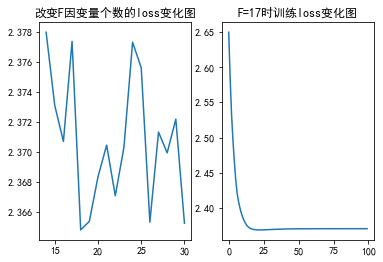

In [148]:
## 画loss图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
plt.plot([i for i in range(14,31)],loss_)
plt.title('改变F因变量个数的loss变化图')
plt.subplot(1,2,2)
plt.plot([i for i in range(100)],loss)
plt.title('F=17时训练loss变化图')
plt.show()

In [149]:
## 保存模型
basicsvd.save()

In [5]:
## 通过对比用户做过的题的数据结构 找到与之最相似的用户
from scipy.stats import pearsonr
label = pd.read_csv('data_label_encode.csv')
###假设用户做过的题号
user_test = ['7','9','90','280','333','628']  
user_test1 = ['10','100','300','280','444','525'] 
user_structure = np.zeros(14)
for number in user_test1:
    if number not in ['288','248','249','681','683']:### 没有第288题
        ## 找到某题目对应的label'
        index = np.where(label.topicid==int(number))[0]
        ## 将某题目对应label转换成数组，便于相加
        tmp = ','.join(label.loc[index[0],'labels_num'].split())
        tmp = np.array(eval(tmp))
        # 相加
        user_structure += tmp
user_structure

array([1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.])

In [6]:
##  计算该用户与用户池里的谁最相似 用皮尔逊系数
similarity = []
for i in range(len(user)):
    user_in_matrix = []
    for j in range(14):
        user_in_matrix.append(user.iloc[i,j])
    similarity.append(pearsonr(user_structure,user_in_matrix)[0])
similar_user = similarity.index(max(similarity))
similarity[similar_user]

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


0.7302967433402217

In [7]:
# 预测该用户偏好的数据结构
## count存储每个数据结构被做过多少次，用来惩罚热门结构
count = {'树': 0.0,'图': 0.0,'数据结构': 0.0,'数学': 0.0,'搜索': 0.0,'算法': 0.0,'Goodbye系列': 0.0,'DP': 0.0,'变换': 0.0,
         '仙人掌': 0.0,'构造': 0.0,'模板题': 0.0,'交互式': 0.0,'分治': 0.0}
for key in new_dict.keys():
    for item, grade in new_dict[key].items():
        if grade > 0 :
            count[item] += grade
predict_grade = []
for item in user.columns.values:
    basicsvd.load()
    predict_grade.append(basicsvd.predict(str(similar_user), item)/np.log(1+count[item]))
#     print(item, basicsvd.predict(str(similar_user), item))

用户有两种选择：

1.以前做过的题 
2.以前没做过的

In [8]:
def select_pre(predict_grade,user_structure,thr):
    predict_grade = np.array(predict_grade)
    grade = predict_grade*np.log(1+user_structure)
    index_ = np.where(grade!=0)
    max_structure = np.where(grade == max(grade[index_]))[0][0]

    ### 根据权重随机选择,在非top1中也选择一个候选人
    grade_copy = grade*1000
    grade_copy[list(grade_copy).index(max(grade_copy))]=0 ## 去掉top1（max_structure）
    value_list = []
    for i in range(14):
        for count in range(int(np.floor(grade_copy[i]))):
            value_list.append(i)
    other_structure = random.choice(value_list)

    # 做过的数据结构中，top1和非top1的较量
    a = random.random()
    if a>thr:
        return max_structure
    else:
        return other_structure

In [9]:
def select_new(predict_grade,user_structure):
    predict_grade = np.array(predict_grade)
    grade = 1000*predict_grade*(1-user_structure)
    index_ = list(np.where(grade!=0)[0])
    ### 根据权重随机选择
    value_list = []
    for i in range(14):
        for count in range(int(np.floor(grade[i]))):
            value_list.append(i)
    pick_value = random.choice(value_list)
    return pick_value

In [10]:
def select(predict_grade,user_structure,thr1,thr2): 
    a = random.random()
    if a>thr1:
        return select_pre(predict_grade,user_structure,thr2)
    else:
        return select_new(predict_grade,user_structure)

In [11]:
## 建议thr1 和 thr2 都取比较小的值。这样用户更容易被推荐到做过的类型的题
structure_id = select(predict_grade,user_structure,0.5,0.3)
structure_name = structure[structure_id]
print(structure_name)
label_structure = label[label[structure_name]>0]
label_structure.index = range(label_structure.shape[0])##恢复索引
print('目前池里有{}道相关题目'.format(label_structure.shape[0]))
label_structure

交互式
目前池里有49道相关题目


curl                    name  \
0    https://uoj.ac/problem/24           【IOI2014】Rail   
1    https://uoj.ac/problem/25           【IOI2014】Wall   
2    https://uoj.ac/problem/26           【IOI2014】Game   
3    https://uoj.ac/problem/27        【IOI2014】Gondola   
4    https://uoj.ac/problem/28         【IOI2014】Friend   
5    https://uoj.ac/problem/29        【IOI2014】Holiday   
6    https://uoj.ac/problem/52            【UR #4】元旦激光炮   
7   https://uoj.ac/problem/117                    欧拉回路   
8   https://uoj.ac/problem/153             【UR #10】世界线   
9   https://uoj.ac/problem/157         【清华集训2015】小Q与找茬   
10  https://uoj.ac/problem/165          【清华集训2015】Flea   
11  https://uoj.ac/problem/166          【清华集训2015】King   
12  https://uoj.ac/problem/173           【WC2016】鏖战表达式   
13  https://uoj.ac/problem/206           【APIO2016】Gap   
14  https://uoj.ac/problem/229          【IOI2015】Boxes   
15  https://uoj.ac/problem/230         【IOI2015】Scales   
16  https://uoj.ac/problem/231          【IOI2015】Teams   
17  https://uoj.ac/problem/232         【IOI2015】Horses   
18  https://uoj.ac/problem/233        【IOI2015】Sorting   
19  https://uoj.ac/problem/234          【IOI2015】Towns   
20  https://uoj.ac/problem/235      【IOI2016】molecules   
21  https://uoj.ac/problem/236       【IOI2016】railroad   
22  https://uoj.ac/problem/237       【IOI2016】shortcut   
23  https://uoj.ac/problem/238          【IOI2016】paint   
24  https://uoj.ac/problem/239          【IOI2016】messy   
25  https://uoj.ac/problem/240         【IOI2016】aliens   
26  https://uoj.ac/problem/286                   同构判定鸡   
27  https://uoj.ac/problem/303          【APIO2017】斑斓之地   
28  https://uoj.ac/problem/304         【APIO2017】考拉的游戏   
29  https://uoj.ac/problem/321         【IOI2017】Wiring   
30  https://uoj.ac/problem/322      【IOI2017】Toy Train   
31  https://uoj.ac/problem/324        【IOI2017】Simurgh   
32  https://uoj.ac/problem/325  【IOI2017】Ancient Books   
33  https://uoj.ac/problem/326            【UTR #3】几何冲刺   
34  https://uoj.ac/problem/327             【UTR #3】去月球   
35  https://uoj.ac/problem/328            【UTR #3】量子破碎   
36  https://uoj.ac/problem/349            【WC2018】即时战略   
37  https://uoj.ac/problem/405           【IOI2018】组合动作   
38  https://uoj.ac/problem/406            【IOI2018】排座位   
39  https://uoj.ac/problem/407             【IOI2018】狼人   
40  https://uoj.ac/problem/408           【IOI2018】机械娃娃   
41  https://uoj.ac/problem/409         【IOI2018】高速公路收费   
42  https://uoj.ac/problem/410             【IOI2018】会议   
43  https://uoj.ac/problem/443         【集训队作业2018】不可名状   
44  https://uoj.ac/problem/444          【集训队作业2018】二分图   
45  https://uoj.ac/problem/445       【集训队作业2018】暴躁的排序鸽   
46  https://uoj.ac/problem/446          【集训队作业2018】传送门   
47  https://uoj.ac/problem/459          【WC2019】I 君的商店   
48  https://uoj.ac/problem/461                新年的Dog划分   

                    labels  rate    set   id  \
0                   交互式      22%    IOI   24   
1               线段树 交互式      40%    IOI   25   
2                   交互式      45%    IOI   26   
3               快速幂 交互式      15%    IOI   27   
4                DP 交互式      47%    IOI   28   
5          决策单调性 DP 交互式      15%    IOI   29   
6                   交互式      28%    UOJ   52   
7   模板题    交互式 MST      构造   32%    NOI  117   
8                构造 交互式      16%    UOJ  153   
9               线段树 交互式       5%   清华集训  157   
10               分治 交互式      21%   清华集训  165   
11                  交互式      11%   清华集训  166   
12              平衡树 交互式      13%     WC  173   
13                     交互式   17%   APIO  206   
14                     交互式   25%    IOI  229   
15                  交互式 搜索   27%    IOI  230   
16                 交互式 线段树   22%    IOI  231   
17                 交互式 线段树   33%    IOI  232   
18                  交互式 构造   32%    IOI  233   
19                交互式 树的中心   14%    IOI  234   
20                  交互式 构造   39%    IOI  235   
21            交互式 欧拉回路 MST   35%    IOI  236   
22                   

## 去重

In [12]:
for i in range(label_structure.shape[0]):
    if str(label_structure.loc[i,'topicid']) in user_test:
        label_structure = label_structure.drop(i)
label_structure.index = range(label_structure.shape[0])##恢复索引
print('去重后，目前池里有{}道相关题目'.format(label_structure.shape[0]))

去重后，目前池里有49道相关题目


## 比较每个题目与用户过往的相似度 排序

In [19]:
##  皮尔逊系数
similarity = []
for i in range(label_structure.shape[0]):
    current_topic = eval(','.join(label_structure.loc[i,'labels_num'].split()))
    similarity_ = pearsonr(current_topic,user_structure)
    similarity.append(similarity_[0])
index_similar = sorted(range(len(similarity)), key=lambda k: similarity[k],reverse=True)
label_structure.index = index_similar
label_structure.sort_index(inplace=True)
similarity_order = sorted(similarity,reverse=True)
print('通过相似度进行排序')

通过相似度进行排序


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## 通过AC率召回

In [14]:
### 用户做题的平均AC率
user_ac = [] ###存储用户做题的ac率
ac_all = [] ###转换成数值型
for topic_user in user_test:
    user_ac.append(label.loc[label['topicid']==int(topic_user),'rate'].values)
for ac in user_ac:
    ac_all.append(int(ac[0].split('%')[0]))
mean_ac = np.mean(ac_all)
mean_ac

29.166666666666668

In [15]:
ac_topicset = [] ### 存储目前题目池中的ac率
for i in range(label_structure.shape[0]):
    ac_topicset.append(int(label_structure.loc[i,'rate'].split('%')[0]))
ac_distance = np.abs(ac_topicset-mean_ac) ## 与mean_ac率的距离
### 对距离进行放缩操作 ==> 得到权重：距离越小，权重越大
for i in range(len(ac_distance)):
    ac_distance[i] = (max(ac_topicset)-ac_distance[i])/max(ac_topicset)
ac_distance

array([0.92833333, 0.89166667, 0.96166667, 0.83166667, 0.48166667,
       0.81833333, 0.97166667, 0.92833333, 0.75833333, 0.84166667,
       0.91166667, 0.84833333, 0.85833333, 0.90166667, 0.94166667,
       0.82166667, 0.85833333, 0.98833333, 0.91833333, 0.97166667,
       0.81833333, 0.97833333, 0.87833333, 0.92166667, 0.77166667,
       0.86833333, 0.81833333, 0.89833333, 0.77833333, 0.95833333,
       0.96833333, 0.99833333, 0.89166667, 0.29166667, 0.99166667,
       0.96833333, 0.95833333, 0.98833333, 0.81833333, 0.87833333,
       0.82166667, 0.97833333, 0.86833333, 0.93166667, 0.82166667,
       0.97166667, 0.99166667, 0.83833333, 0.72166667])

In [24]:
final_similar = similarity_order*ac_distance
index_similar = sorted(range(len(final_similar)), key=lambda k: final_similar[k],reverse=True)
label_structure.index = index_similar
# label_structure.sort_index(inplace=True)
# similarity_order = sorted(similarity,reverse=True)
# similarity_order

In [25]:
print('通过AC率再次排序')
print('最终结果:{}'.format(index_similar[0]))

通过AC率再次排序
最终结果:6


In [26]:
final_similar

array([0.60341667, 0.57556836, 0.62075316, 0.53683852, 0.3109145 ,
       0.5282319 , 0.62720814, 0.59923659, 0.48950206, 0.5432935 ,
       0.5884783 , 0.54759681, 0.55405178, 0.54761124, 0.46944649,
       0.36185009, 0.37640407, 0.43341284, 0.40271581, 0.42610402,
       0.35886291, 0.42902755, 0.38517465, 0.40417757, 0.33839822,
       0.38078936, 0.35886291, 0.39394523, 0.34132175, 0.42025697,
       0.42464226, 0.43779813, 0.3910217 , 0.12790429, 0.4348746 ,
       0.42464226, 0.42025697, 0.43341284, 0.35886291, 0.38517465,
       0.36032467, 0.42902755, 0.38078936, 0.40856286, 0.15911507,
       0.18816244, 0.19203542, 0.16234255, 0.03972644])